In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pvlib
from datetime import timedelta
from acpower import acpower, acpower_local

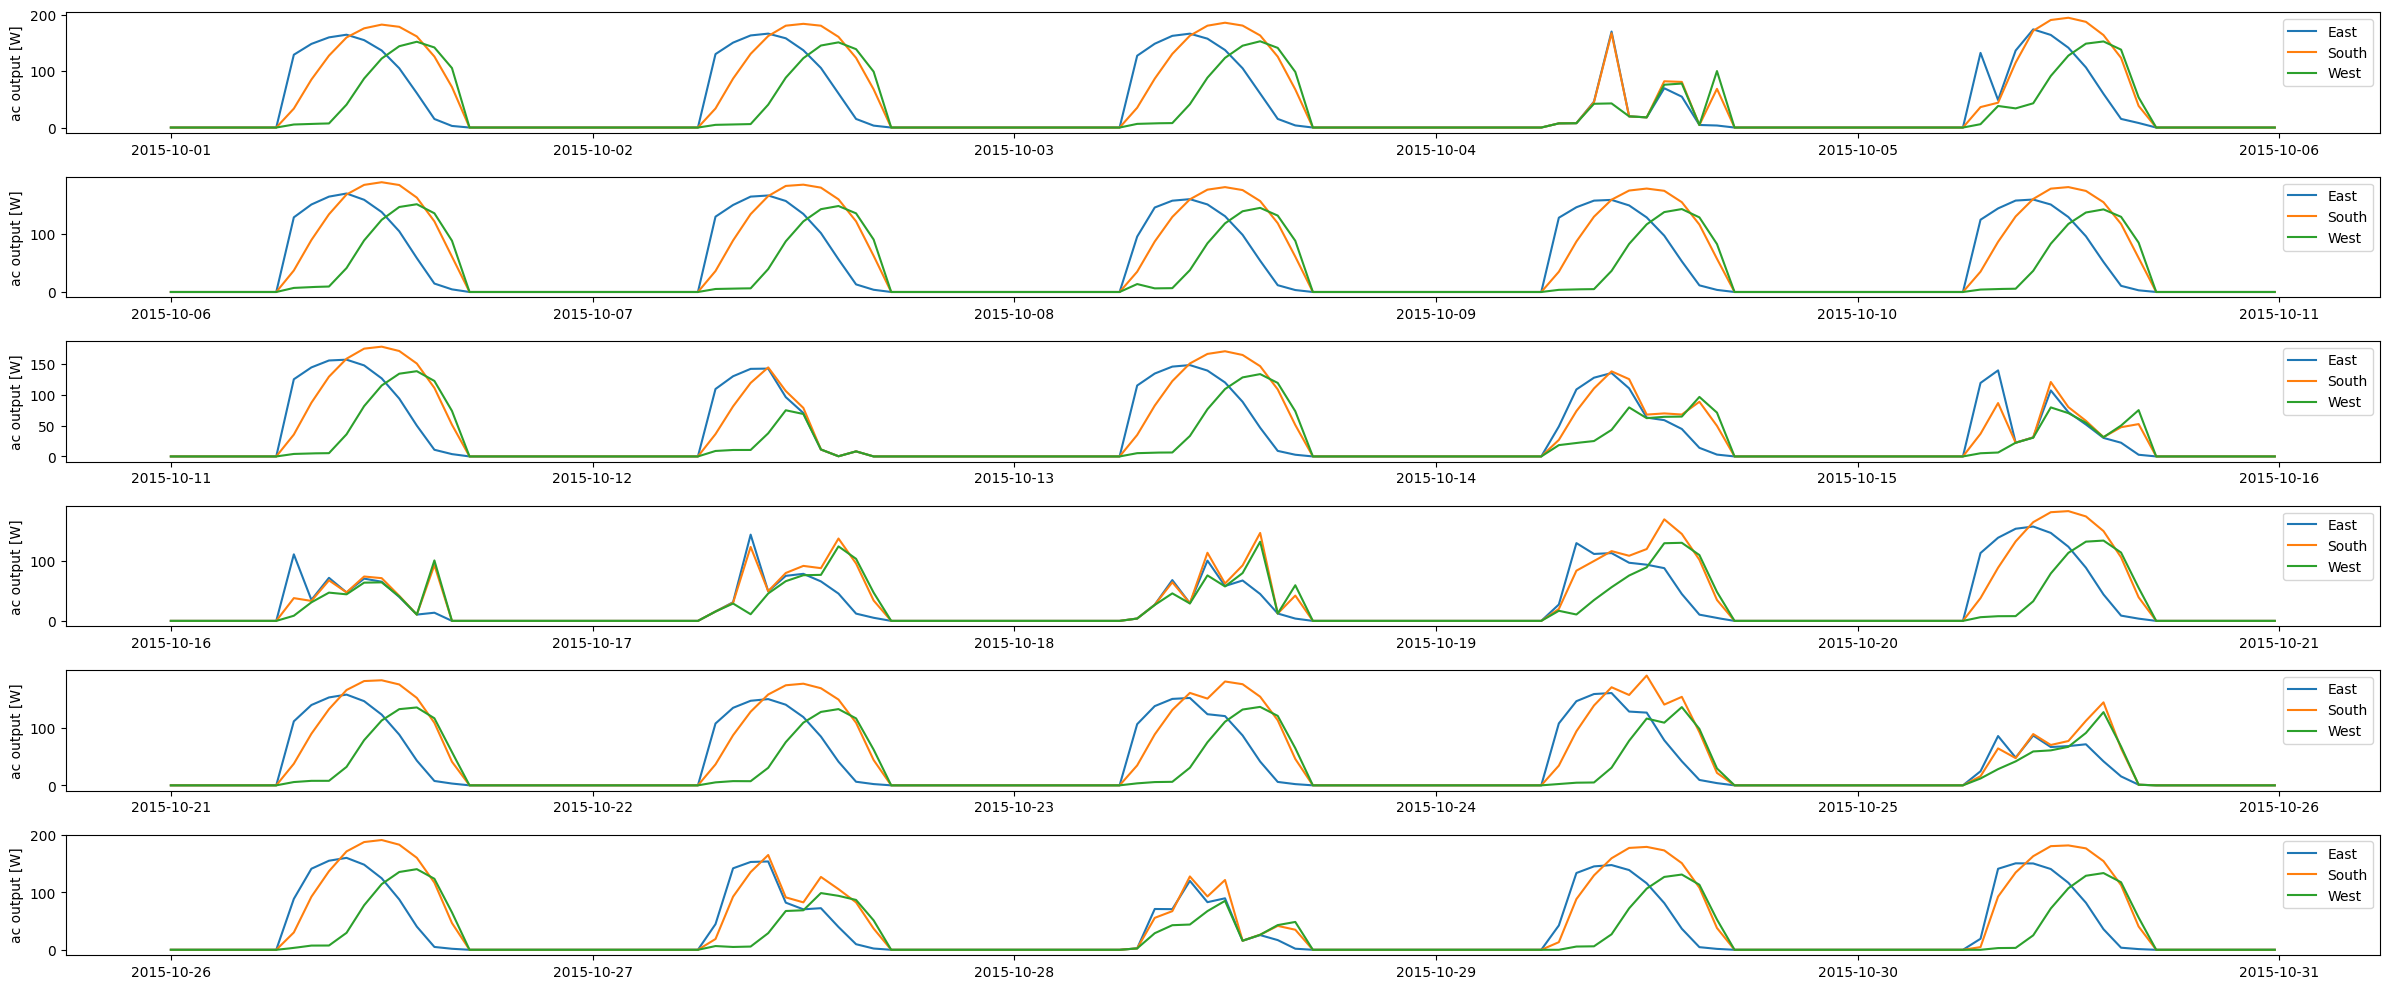

In [2]:
# weather
weather = pd.read_excel("./data/Pecan Street Smart Meter Data/weather.xlsx")
weather = weather[weather["Month"] == 10]
weather["local_time"] = pd.to_datetime(weather[['Year', 'Month', 'Day', 'Hour']])
weather.index = weather["local_time"] + timedelta(hours=6)
weather.index.name = "utc_time"
# location
location = (33.641825, -96.596706, 'Pecan Street', 8, 'Etc/GMT+6')
# surface tilt default latitude
surface_tilt = 33.641825
# Calculation
ac_e = acpower_local(weather, location, surface_tilt, 90)
ac_s = acpower_local(weather, location, surface_tilt, 180)
ac_w = acpower_local(weather, location, surface_tilt, 270)
tau = 480 # interval
plt.figure(figsize=(24,10))
for i in range(6):
      plt.subplot(6,1,i+1)
      plt.plot(ac_e[tau*i:tau*(i+1)], label = "East")
      plt.plot(ac_s[tau*i:tau*(i+1)], label = "South")
      plt.plot(ac_w[tau*i:tau*(i+1)], label = "West")
      plt.legend(fontsize=10)
      plt.ylabel("ac output [W]")
plt.tight_layout()